# DESAFIO

ler o arquivo de estátistica da Loja do Google “googleplaystore.csv”, processar e gerar gráficos de análise utilizando as bibliotecas "Pandas" e "Matplotlib". 

___

## Etapa 1

- importando a biblioteca pandas e lendo o arquivo csv para iniciar as atividades no dataset
- Removendo linhas duplicadas e eliminando linhas desnecessárias para a análise.

In [43]:

import pandas as pd

dados = pd.read_csv("C:/Users/yasmi/Desktop/CompassUol/Sprint03/googleplaystore.csv")

dados = dados.drop_duplicates()
dados = dados[dados['Type'].isin(['Paid', 'Free'])]

dados


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## Etapa 2

**Objetivo**: fazer um gráfico de barras contendo o top 5 apps por número de instalação.

- foi necessário retirar o caracte "+" que havia no final das linhas de Installs,  e transformar a coluna em númerica.

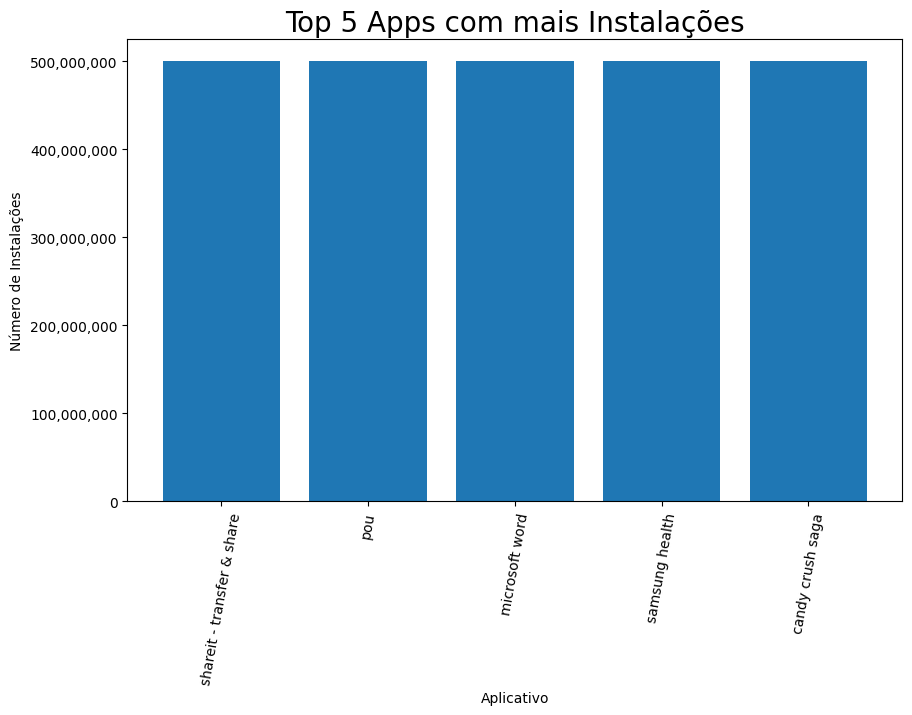

In [62]:
import matplotlib.pyplot as plt

top_5_instalacoes = dados.sort_values(by='Installs', ascending=False).head(5)

# convertendo as instalações para numérico e retirando os caracteres "+" para uma melhor visualização do gráfico
top_5_instalacoes['Installs'] = pd.to_numeric(top_5_instalacoes['Installs'].replace({'[+,]': ''}, regex=True))

plt.figure(figsize=(10, 6))  
plt.bar(top_5_instalacoes['App'], top_5_instalacoes['Installs'])
plt.title('Top 5 Apps com mais Instalações', size=20)
plt.xlabel('Aplicativo')
plt.ylabel('Número de Instalações')
plt.xticks(rotation=80)

# Formatação do eixo Y para exibir os números de forma legível
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))

plt.show()


## Etapa 3

**Objetivo**: fazer um gráfico de pizza (pie chart) mostrando as categorias de apps existentes no dataset de acordo com a frequência em que elas aparecem

- decidi mostrar os nomes das categorias somente na legenda (que os nomes estão organizados da maior qtd para a menor) para uma maior legibilidade, pois há muitas categorias, e elas ficariam sobpostas. Para compensar, coloquei a porcentagem e as cores mais agradavéis e fácil de localizar na legenda.


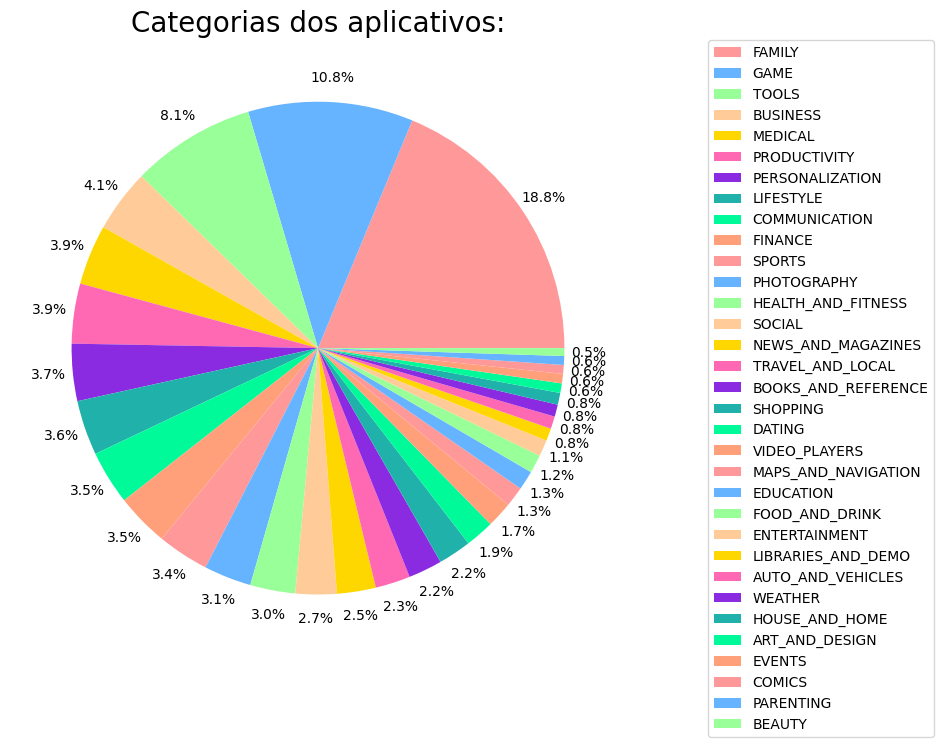

In [58]:
import matplotlib.pyplot as plt

apps_categorias = dados['Category'].value_counts()

cores = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700', '#FF69B4', '#8A2BE2', '#20B2AA', '#00FA9A', '#FFA07A']

plt.figure(figsize=(8, 8))
plt.pie(apps_categorias, autopct='%1.1f%%',pctdistance=1.1, colors=cores)
plt.title("Categorias dos aplicativos:", fontsize=20)
plt.legend(apps_categorias.index, bbox_to_anchor=(1.5, 1), loc='upper right', borderaxespad=0)
plt.show()

## Etapa 4

**Objetivo**: mostrar qual o app mais caro existente no dataset

- foi preciso tratar os dados da coluna Price, removendo caracteres como "$" e ","
- transformar a coluna em numérica e transformando valores inválidos para NaN.

In [72]:
dados['Price'] = dados['Price'].replace({r'\$': '', ',': ''}, regex=True)
dados['Price'] = pd.to_numeric(dados['Price'], errors='coerce')

app_mais_caro = dados[dados['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(1)


print(app_mais_caro[['App', 'Price']])

                           App  Price
4367  i'm rich - trump edition  400.0


## Etapa 5

**Objetivo**: mostrar quantos apps são classificados como “mature 17+”

- criei uma variavel para filtrar e calcular a quantidade de vezes que "mature 17+" aparece na coluna "Content Rating"

In [85]:
quantidade_mature = dados[dados['Content Rating'] == 'Mature 17+'].shape[0]

print(f"Quantidade de apps classificados como 'Mature 17+': {quantidade_mature}")

Quantidade de apps classificados como 'Mature 17+': 447


## Etapa 6 

**Objetivo**: mostar o top 10 apps por número de views  e seu número de views, ordenanr a lista em forma decrescente por número de views

- tratando e limpando os dados da coluna reviws e app para deixar um top 10 mais limpo e sem mostar varias versões de um mesmo app

In [60]:
dados['Reviews'] = pd.to_numeric(dados['Reviews'], errors='coerce')
dados['App'] = dados['App'].str.strip().str.lower()

apps_top10_views = dados.groupby('App').agg({'Reviews': 'max'}).reset_index()
apps_top10_views = apps_top10_views.sort_values(by='Reviews', ascending=False).head(10)

print(apps_top10_views[['App', 'Reviews']])

                                                    App   Reviews
4249                                           facebook  78158306
9320                                 whatsapp messenger  69119316
5560                                          instagram  66577446
6344           messenger – text and video chat for free  56646578
2428                                     clash of clans  44893888
2439            clean master- space cleaner & antivirus  42916526
8330                                     subway surfers  27725352
9524                                            youtube  25655305
7936  security master - antivirus, vpn, applock, boo...  24900999
2430                                       clash royale  23136735


## Etapa 7

Objetivo: criar pelo menos mais 2 cálculos sobre o dataset  e  apresentar um em forma de lista e outro em formato de valor.

- Top 10 apps por número de reviews

In [ ]:
top_10_reviews = dados.sort_values(by='Reviews', ascending=False).head(10)

print("Top 10 Apps por número de Reviews:")
print(top_10_reviews[['App', 'Reviews']])

- Número médio de instalações

In [ ]:
media_instalacoes = dados['Installs'].mean()

print(f'\nNúmero médio de instalações: {media_instalacoes:.2f}')

## Etapa 8

**Obetivo**: criar pelo menos 2 outras formas gráficas de exibição dos indicadores acima utilizando a biblioteca matplotlib. Escolha tipos de gráficos diferentes dos explorados acima, ex: linhas e dispersão



- gráfico de ... do top 10 apps por reviews

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(apps_top10_reviws['App'], apps_top10_reviws['Reviews'], marker='o', color='blue')
plt.title("Gráfico de Linha: Top 10 Apps por Reviews")
plt.xticks(rotation=80)
plt.xlabel("Aplicativos")
plt.ylabel("Número de Reviews")
plt.tight_layout()
plt.show()


- gráfico de ... do numero médio de instalações

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(app_mais_caro)
plt.title("Aplicativo mais caro:")
plt.show()
